In [17]:
from bs4 import BeautifulSoup
import re  
import urllib.request, urllib.error  # certain URL
import xlwt  # excel operation
 
 
def main():
    baseurl = "https://movie.douban.com/top250?start="
    datalist = getdata(baseurl)
    savepath = ".\\douban_top250.csv"
    savedata(datalist, savepath)
 
 
# compile返回的是匹配到的模式对象
findLink = re.compile(r'<a href="(.*?)">')  # detail
findImgSrc = re.compile(r'<img.*src="(.*?)"', re.S)  # re.S  message of picture
findTitle = re.compile(r'<span class="title">(.*)</span>')  # name 
findRating = re.compile(r'<span class="rating_num" property="v:average">(.*)</span>')  # score
findJudge = re.compile(r'<span>(\d*)人评价</span>')  # number
findInq = re.compile(r'<span class="inq">(.*)</span>')  # about
findBd = re.compile(r'<p class="">(.*?)</p>', re.S)  # actor..
 
 
##获取网页数据
def getdata(baseurl):
    datalist = []
    for i in range(0, 10):
        url = baseurl + str(i * 25)  ##move on next page
        html = geturl(url)
        soup = BeautifulSoup(html, "html.parser")  #  BeautifulSoup soup，html
        for item in soup.find_all("div", class_='item'):  ##find_all 
            data = []  # save HTML 
            item = str(item)  ##trans
            link = re.findall(findLink, item)[0]  
            data.append(link)
 
            imgSrc = re.findall(findImgSrc, item)[0]
            data.append(imgSrc)
 
            titles = re.findall(findTitle, item)  ##en zh transla
            if (len(titles) == 2):
                onetitle = titles[0]
                data.append(onetitle)
                twotitle = titles[1].replace("/", "")  # can
                data.append(twotitle)
            else:
                data.append(titles)
                data.append(" ")  ##value
 
            rating = re.findall(findRating, item)[0]  # add score
            data.append(rating)
 
            judgeNum = re.findall(findJudge, item)[0]  # add number
            data.append(judgeNum)
 
            inq = re.findall(findInq, item)  # add abut
            if len(inq) != 0:
                inq = inq[0].replace("。", "")
                data.append(inq)
            else:
                data.append(" ")
 
            bd = re.findall(findBd, item)[0]
            bd = re.sub('<br(\s+)?/>(\s+)?', " ", bd)
            bd = re.sub('/', " ", bd)
            data.append(bd.strip())  # cancel
            datalist.append(data)
    return datalist
 
 
##保存数据
def savedata(datalist, savepath):
    workbook = xlwt.Workbook(encoding="utf-8", style_compression=0)  ##style_compression=0
    worksheet = workbook.add_sheet("douban_top250", cell_overwrite_ok=True)  # cell_overwrite_ok=True
    column = ("电影详情链接", "图片链接", "影片中文名", "影片外国名", "评分", "评价数", "概况", "相关信息")  ##execl
    for i in range(0, 8):
        worksheet.write(0, i, column[i])  # 将column[i] save [0]
    for i in range(0, 250):
        data = datalist[i]
        for j in range(0, 8):
            worksheet.write(i + 1, j, data[j])
    workbook.save(savepath)
 
 
##爬取网页
def geturl(url):
    head = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                      "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36"
    }
    req = urllib.request.Request(url, headers=head)
    try:  ## check error
        response = urllib.request.urlopen(req)
        html = response.read().decode("utf-8")
    except urllib.error.URLError as e:
        if hasattr(e, "code"):  
            print(e.code)
        if hasattr(e, "reason"):
            print(e.reason)
    return html
 
 
if __name__ == '__main__':
    main()
    print("爬取成功！！！")

爬取成功！！！


In [19]:
from bs4 import BeautifulSoup
import re
import urllib.request, urllib.error  # for URL requests
import csv  # for saving as CSV


def main():
    baseurl = "https://movie.douban.com/top250?start="
    datalist = getdata(baseurl)
    savepath = "./douban_top250.csv"
    savedata(datalist, savepath)


# Regular expressions to extract information
findLink = re.compile(r'<a href="(.*?)">')  # detail link
findImgSrc = re.compile(r'<img.*src="(.*?)"', re.S)  # image link
findTitle = re.compile(r'<span class="title">(.*)</span>')  # movie title
findRating = re.compile(r'<span class="rating_num" property="v:average">(.*)</span>')  # rating
findJudge = re.compile(r'<span>(\d*)人评价</span>')  # number of reviews
findInq = re.compile(r'<span class="inq">(.*)</span>')  # summary
findBd = re.compile(r'<p class="">(.*?)</p>', re.S)  # additional info


# Function to get data from the website
def getdata(baseurl):
    datalist = []
    for i in range(0, 10):
        url = baseurl + str(i * 25)  # Go to the next page
        html = geturl(url)
        soup = BeautifulSoup(html, "html.parser")
        for item in soup.find_all("div", class_='item'):  # Extract movie items
            data = []  # Save movie data
            item = str(item)  # Convert to string for regex
            link = re.findall(findLink, item)[0]  # Detail link
            data.append(link)

            imgSrc = re.findall(findImgSrc, item)[0]  # Image link
            data.append(imgSrc)

            titles = re.findall(findTitle, item)  # Titles (CN and foreign)
            if len(titles) == 2:
                data.append(titles[0])  # Chinese title
                data.append(titles[1].replace("/", "").strip())  # Foreign title
            else:
                data.append(titles[0])  # Only Chinese title
                data.append(" ")  # Empty for foreign title

            rating = re.findall(findRating, item)[0]  # Rating
            data.append(rating)

            judgeNum = re.findall(findJudge, item)[0]  # Number of reviews
            data.append(judgeNum)

            inq = re.findall(findInq, item)  # Summary
            if len(inq) != 0:
                data.append(inq[0].replace("。", ""))
            else:
                data.append(" ")

            bd = re.findall(findBd, item)[0]  # Additional info
            bd = re.sub('<br(\s+)?/>(\s+)?', " ", bd)  # Replace line breaks
            bd = re.sub('/', " ", bd)  # Replace slashes
            data.append(bd.strip())

            datalist.append(data)
    return datalist


# Function to save data to a CSV file
def savedata(datalist, savepath):
    headers = ["电影详情链接", "图片链接", "影片中文名", "影片外国名", "评分", "评价数", "概况", "相关信息"]
    with open(savepath, mode='w', encoding='utf-8', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(headers)  # Write headers
        for data in datalist:
            writer.writerow(data)  # Write each movie's data


# Function to get HTML content from a URL
def geturl(url):
    head = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                      "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36"
    }
    req = urllib.request.Request(url, headers=head)
    try:
        response = urllib.request.urlopen(req)
        html = response.read().decode("utf-8")
    except urllib.error.URLError as e:
        if hasattr(e, "code"):
            print(e.code)
        if hasattr(e, "reason"):
            print(e.reason)
        return ""
    return html


if __name__ == '__main__':
    main()
    print("爬取成功并保存为CSV文件！")


爬取成功并保存为CSV文件！


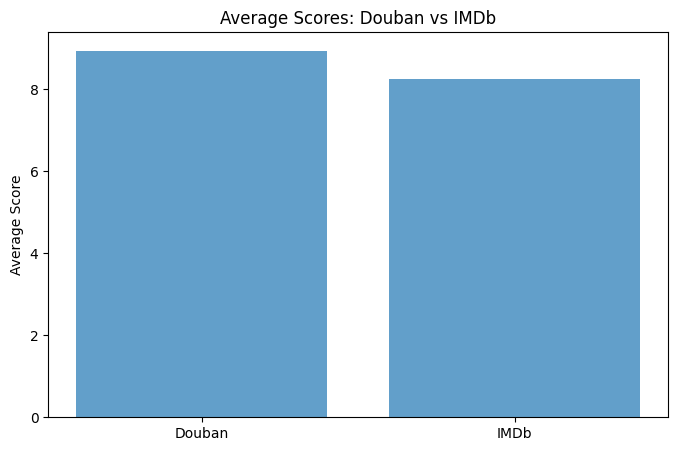

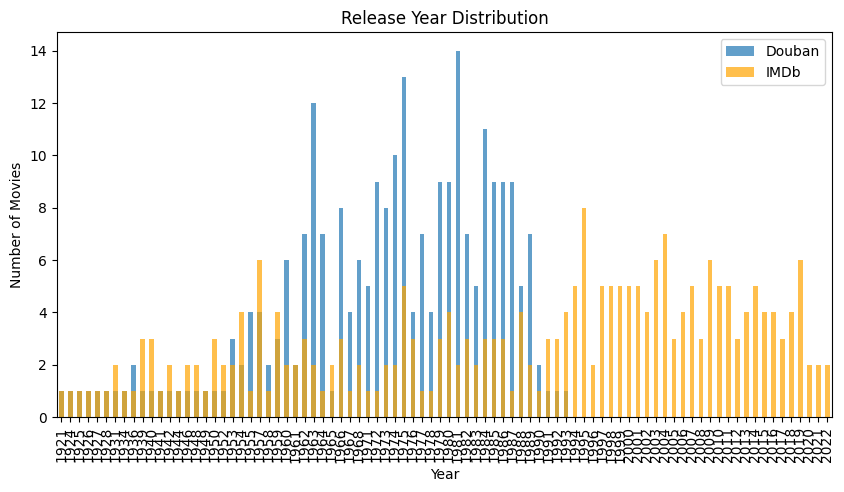

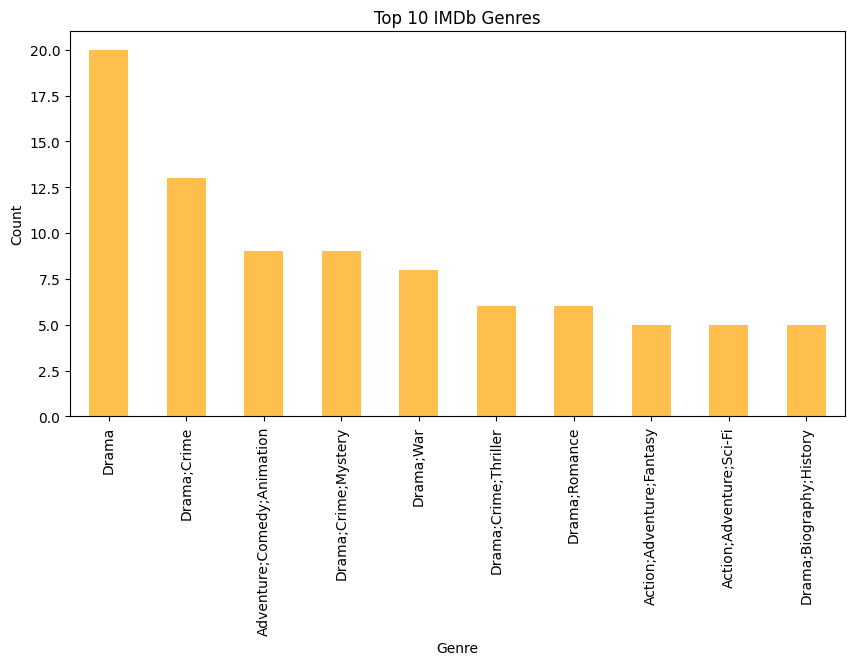

C:\Users\26768\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23467 (\N{CJK UNIFIED IDEOGRAPH-5BAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\26768\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23822 (\N{CJK UNIFIED IDEOGRAPH-5D0E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\26768\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39567 (\N{CJK UNIFIED IDEOGRAPH-9A8F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\26768\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20811 (\N{CJK UNIFIED IDEOGRAPH-514B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\26768\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py

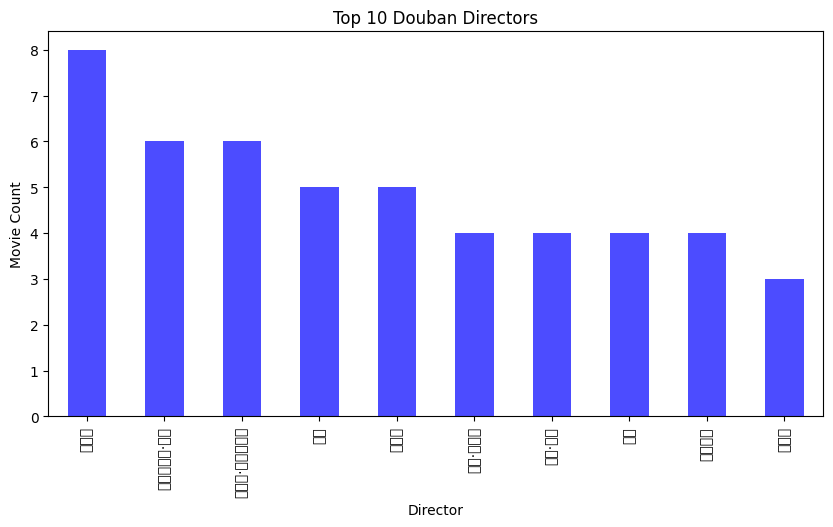

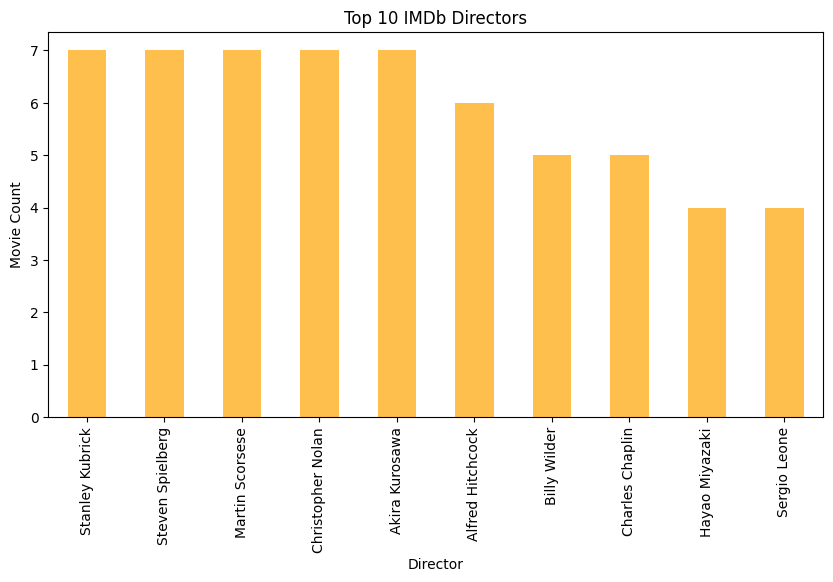

豆瓣平均评分: 8.9396
IMDb平均评分: 8.254
重叠电影数量: 0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
douban_file_path = 'douban_top250.csv'  
imdb_file_path = 'IMDB_Top250.csv'      

douban_data = pd.read_csv(douban_file_path, encoding='utf-8', on_bad_lines='skip')
imdb_data = pd.read_csv(imdb_file_path, encoding='utf-8', on_bad_lines='skip')

# Renaming columns for clarity and merging compatibility
douban_data.rename(columns={
    '影片中文名': 'Title',
    '评分': 'Douban_Score',
    '评价数': 'Douban_Reviews',
    '相关信息': 'Douban_Info'
}, inplace=True)

imdb_data.rename(columns={
    'Name': 'Title',
    'Year': 'Release_Year',
    'IMDB Ranking': 'IMDB_Score',
    'Genre': 'IMDB_Genre',
    'Director': 'IMDB_Director'
}, inplace=True)

# Calculate average scores for both platforms
douban_avg_score = douban_data['Douban_Score'].mean()
imdb_avg_score = imdb_data['IMDB_Score'].mean()

# Find overlapping movies by title
overlap_movies = pd.merge(douban_data, imdb_data, on='Title')

# Visualize average scores
plt.figure(figsize=(8, 5))
plt.bar(['Douban', 'IMDb'], [douban_avg_score, imdb_avg_score], alpha=0.7)
plt.title('Average Scores: Douban vs IMDb')
plt.ylabel('Average Score')
plt.show()

# Analyze release year distribution
plt.figure(figsize=(10, 5))
douban_data['Douban_Info'] = douban_data['Douban_Info'].astype(str)
douban_years = douban_data['Douban_Info'].str.extract(r'(\d{4})').dropna()
douban_years = douban_years[0].astype(int).value_counts().sort_index()

imdb_years = imdb_data['Release_Year'].value_counts().sort_index()

douban_years.plot(kind='bar', alpha=0.7, label='Douban', figsize=(10, 5))
imdb_years.plot(kind='bar', alpha=0.7, label='IMDb', color='orange')
plt.title('Release Year Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()

# Analyze genre distribution
imdb_genres = imdb_data['IMDB_Genre'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(10, 5))
imdb_genres.head(10).plot(kind='bar', alpha=0.7, color='orange')
plt.title('Top 10 IMDb Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# Top directors by movie count
douban_directors = douban_data['Douban_Info'].str.extract(r'导演: (.+?) ').dropna()
douban_top_directors = douban_directors[0].value_counts().head(10)

imdb_top_directors = imdb_data['IMDB_Director'].value_counts().head(10)

plt.figure(figsize=(10, 5))
douban_top_directors.plot(kind='bar', alpha=0.7, label='Douban', color='blue')
plt.title('Top 10 Douban Directors')
plt.xlabel('Director')
plt.ylabel('Movie Count')
plt.show()

plt.figure(figsize=(10, 5))
imdb_top_directors.plot(kind='bar', alpha=0.7, label='IMDb', color='orange')
plt.title('Top 10 IMDb Directors')
plt.xlabel('Director')
plt.ylabel('Movie Count')
plt.show()

# Save overlapping movies to a CSV file
overlap_movies.to_csv('overlap_movies.csv', index=False)

# Print results
print(f"豆瓣平均评分: {douban_avg_score}")
print(f"IMDb平均评分: {imdb_avg_score}")
print(f"重叠电影数量: {len(overlap_movies)}")
